# Yogendra Verma

In [ ]:
## CNN_Clothes_classi_V1.ipynb

In [1]:
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout

Using TensorFlow backend.


**Define CNN Model**

In [2]:
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
  model.add(MaxPooling2D((2, 2)))
  #model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  #model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  #model.add(Dropout(0.4))
  model.add(Dense(1, activation='sigmoid'))

	# compile model
  #opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()

**Prepare Clothes Image Dataset and train the Model**

In [3]:
# call define model function
model = define_model()

## create data Augument generators
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
datagen = ImageDataGenerator(rescale=1.0/255.0)

# prepare iterators
train_it = train_datagen.flow_from_directory('/content/drive/My Drive/CNN/fk_clothes_data/train_clothes',
class_mode='binary', batch_size=70, target_size=(200, 200))
test_it = test_datagen.flow_from_directory('/content/drive/My Drive/CNN/fk_clothes_data/test_clothes',
class_mode='binary', batch_size=70, target_size=(200, 200))

# fit model
history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 0 could not be retrieved. It could be because a worker has died.
  UserWarning)


In [4]:
# evaluate model
_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))
# learning curves
summarize_diagnostics(history)

> 67.500


**Load Image for Validation**

In [5]:
import keras
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
image = image.load_img('/content/drive/My Drive/CNN/fk_clothes_data/validate_clothes/tr1.jpeg', target_size=(200, 200))
input_arr = keras.preprocessing.image.img_to_array(image)
#x = np.expand_dims(input_arr, axis=0)   ## Convert single image to a batch.
input_arr = np.array([input_arr])        ## Convert single image to a batch.
#predictions = model.predict(input_arr)

**Prediction**

In [6]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
# load model
#model = load_model('my_flower_classi_model')
#predictions_classes = model.predict_classes(input_arr)

predictions_classes = model.predict_classes(input_arr)

def predict_img():
  if predictions_classes ==0:
    print("Class {} means it is a 'Jeans Image'".format(predictions_classes))
  if predictions_classes ==1:
    print("Class {} means it is a 'Trouser Image'".format(predictions_classes))

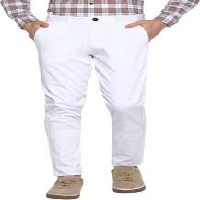

In [7]:
image

In [8]:
predict_img()

Class [[1]] means it is a 'Trouser Image'
